In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Répartition des labels

In [ ]:
# chargement des labels

labels_df = pd.read_csv('../data/labels/Y_train.csv')
labels_df.head()

,Unnamed: 0,filename,window,lib,Label
0,0,15b3bab7c186fd35b65df777890c427dd243feacbb85dd...,2003,Die01,Missing
1,1,1856617e1ac2d821a46a41b938818f0169342226a78f93...,2003,Die01,GOOD
2,2,19066cce773b3a092ebf4311b11858aa653da6f8274957...,2003,Die01,Missing
3,3,19c10caf4b24284e1748caed62d94cbb689d6b379b1cf5...,2003,Die01,GOOD
4,4,1a627426d55a668df8bcd381a7fa87b620481995b6755f...,2003,Die01,Missing


In [ ]:
# examen des labels existants

available_labels = labels_df["Label"].unique()

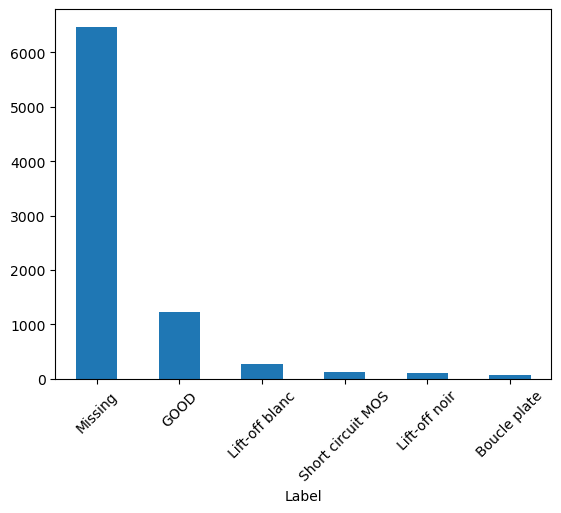

In [ ]:
# répartition des labels

label_count = labels_df["Label"].value_counts()
label_count.plot(kind="bar")
plt.xticks(rotation=45)
plt.show()

## Visualisation des données

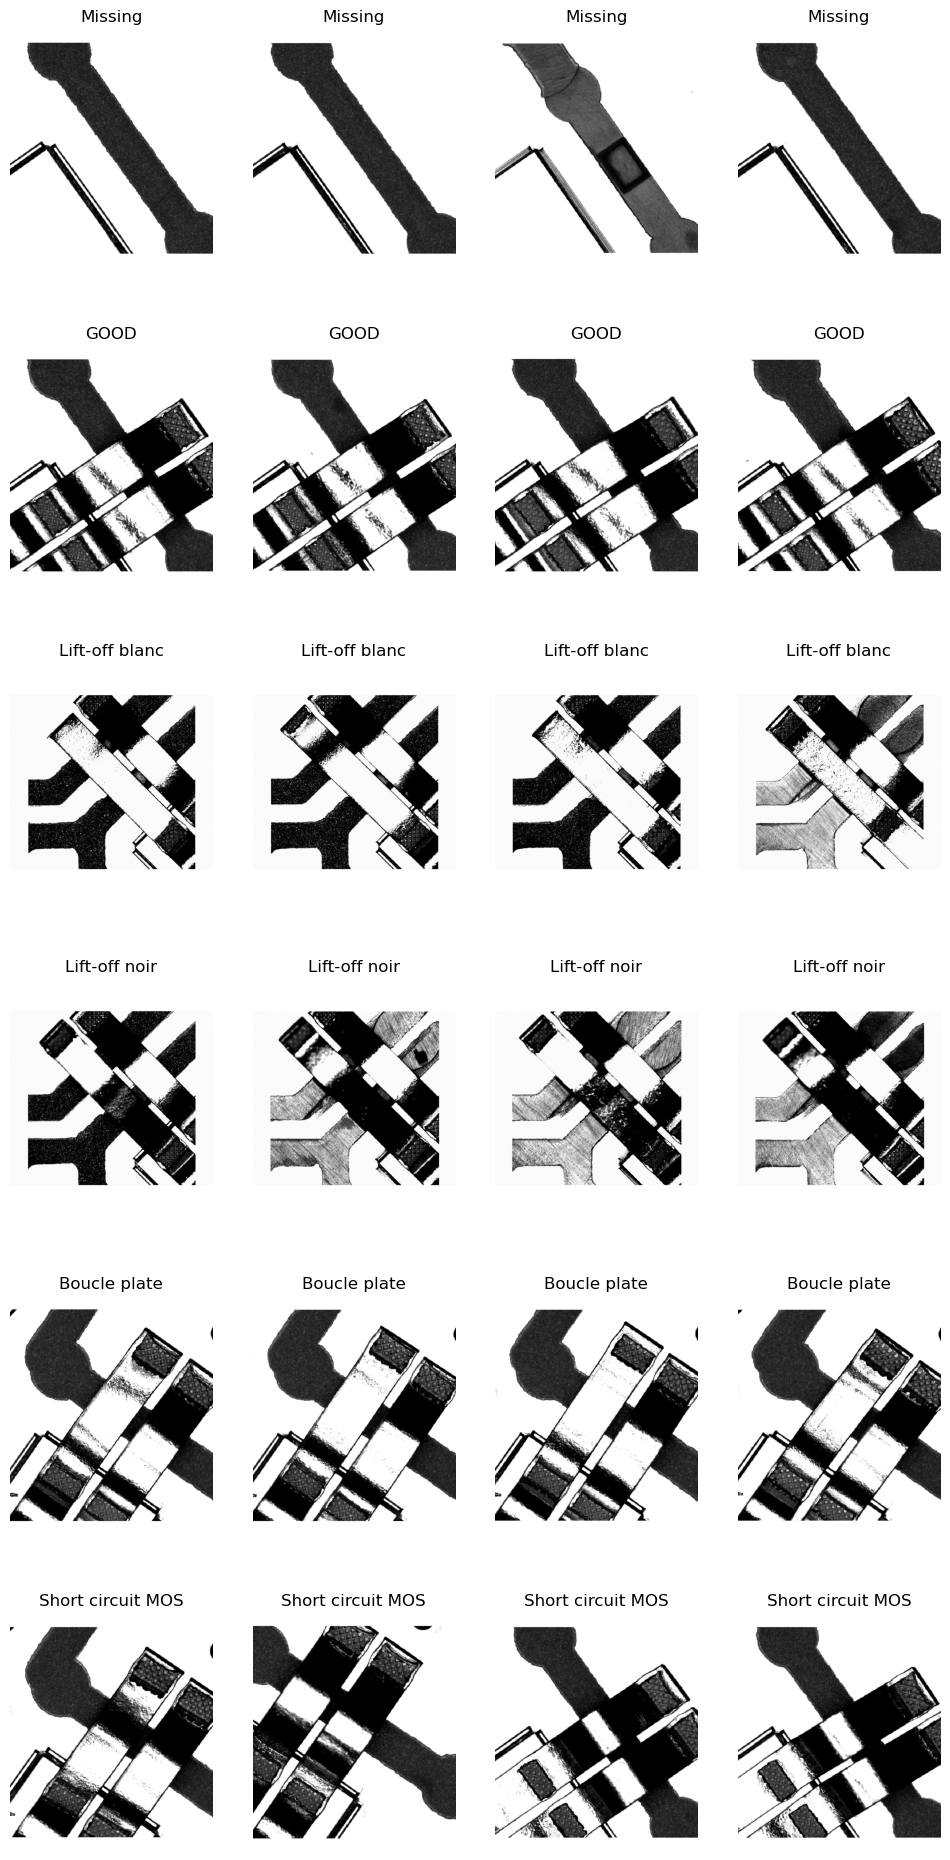

In [ ]:
# récupération d'images pour chaque label pour les analyser

# récupération des images sous la forme d'un dictionnaire
data_path = '../data/raw/'
n_pic = 4
sample_images = {}
for label in available_labels:
    sample_images[label] = []
    for i in range(n_pic):
        filename = labels_df.loc[labels_df["Label"] == label, "filename"].iloc[i]  # type: ignore
        image = Image.open(data_path + filename)
        sample_images[label].append(image)

# affichage des images
row = len(available_labels)
col = len(list(sample_images.values())[0]) # type: ignore
fig, axes = plt.subplots(row, col, figsize=(row*2, col*6))
for i, image_batch in zip(range(len(sample_images.keys())), sample_images.values()):
    label = list(sample_images.keys())[i]
    for j in range(len(image_batch)):
        axes[i, j].imshow(image_batch[j], cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(label)  # type: ignore
plt.show()

## Visualisation de la rotation et du croping

In [ ]:
# extrait du notebook benchmark

rot_crop_data = {
        "Die01":[55,(340, 120, 500, 680)], # (left, upper, right, lower)
        "Die02":[-44, (480, 210, 640, 930)],
        "Die03":[134, (460, 200, 620, 920)],
        "Die04":[35, (310, 130, 470, 690)]
}

In [ ]:
# définition des fonctions rot et crop et de la fonction rot_crop

def rot(image: Image.Image, angle: float) -> Image.Image:
    """Réalise la rotation de l'image.

    Args:
        image (Image.Image): image au FORMAT PILLOW
        angle (float): angle en DEGRES

    Returns:
        Image.Image: image tournée
    """
    return image.rotate(angle)

def crop(image: Image.Image, box: tuple[float, float, float, float]) -> Image.Image:
    """Réalise le cropping de l'image.

    Args:
        image (Image.Image): image au FORMAT PILLOW
        coords (tuple[float]): coordonnées en PIXELS au format (L, U, R, Lo)

    Returns:
        Image.Image: image croppée
    """
    return image.crop(box)

def rot_crop(image: Image.Image, angle: float, box: tuple[float, float, float, float]) -> Image.Image:
    """Réalise à la fois la rotation et le cropping.

    Args:
        image (Image.Image): image au FORMAT PILLOW
        angle (float): angle en DEGRES
        box (tuple[float, float, float, float]): coordonnées en PIXELS au format (L, U, R, Lo)

    Returns:
        Image.Image: image croppée et tournée
    """
    return image.rotate(angle).crop(box)

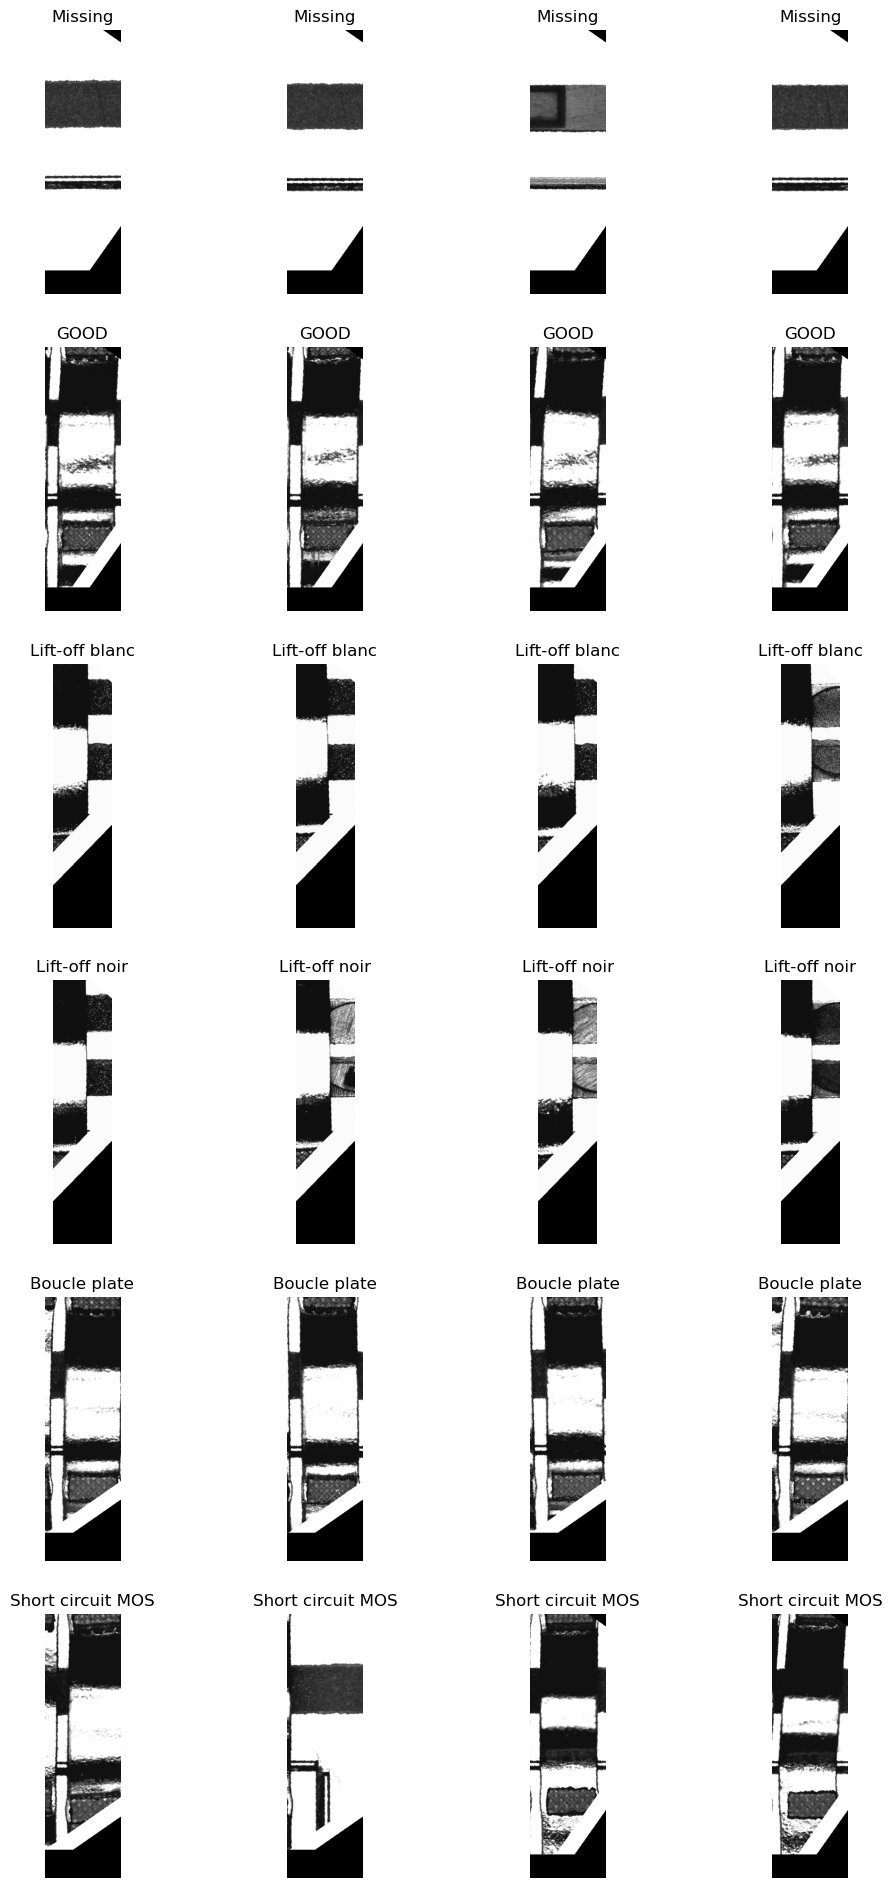

In [ ]:
# Récupération d'images avec rot et crop

# récupération des images sous la forme d'un dictionnaire
data_path = '../data/raw/'
n_pic = 4
sample_images = {}
for label in available_labels:
    sample_images[label] = []
    for i in range(n_pic):
        filename = labels_df.loc[labels_df["Label"] == label, "filename"].iloc[i]  # type: ignore
        rot_crop_type = labels_df.loc[labels_df["Label"] == label, "lib"].iloc[i]  # type: ignore
        image = Image.open(data_path + filename)
        angle, box = rot_crop_data[rot_crop_type]
        image = rot_crop(image, angle, box)
        sample_images[label].append(image)

# affichage des images
row = len(available_labels)
col = len(list(sample_images.values())[0]) # type: ignore
fig, axes = plt.subplots(row, col, figsize=(row*2, col*6))
for i, image_batch in zip(range(len(sample_images.keys())), sample_images.values()):
    label = list(sample_images.keys())[i]
    for j in range(len(image_batch)):
        axes[i, j].imshow(image_batch[j], cmap="gray")
        axes[i, j].axis("off")
        axes[i, j].set_title(label)  # type: ignore
plt.show()